In [1]:
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split

from model import MSCNN
from image_handlers import MallImageLoader

In [2]:
mall = MallImageLoader(new_shape=(224, 224))
mall.load_data()

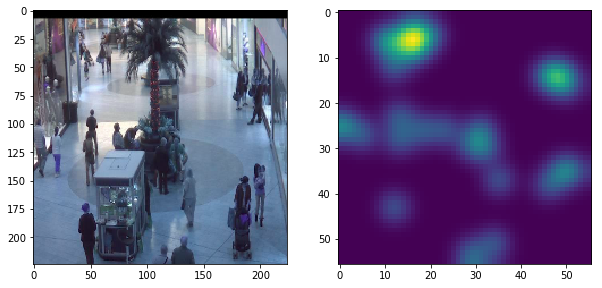

In [3]:
mall.plot_images(0)

In [4]:
input_shape=(mall.new_shape[0], mall.new_shape[1], 3)

model = MSCNN(input_shape)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 224, 224, 64) 15616       input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 64) 331840      conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 224, 224, 64) 200768      conv2d[0][0]                     
_____________________________________

In [5]:
x_train, x_test, y_train, y_test = train_test_split(mall.x, mall.y, test_size=0.2, random_state=0)
print('x_train', x_train.shape)
print('y_train', y_train.shape)

x_train (1600, 224, 224, 3)
y_train (1600, 56, 56, 1)


In [ ]:
# opt = SGD(lr=1e-5, momentum=0.9, decay=0.0005)
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001)
model.compile(optimizer=opt, loss='mse')

hist = model.fit(x_train, y_train, epochs=30, batch_size=16, validation_split=0.1, verbose=1)

test_score = model.evaluate(x_test, y_test)
print('Train score:', model.history.history['loss'][-1])
print('Test score:', test_score)

In [ ]:
model.save_weights('model_weights.h5')
model.save('smodel.h5')

df = pd.DataFrame.from_dict(hist.history)
df.to_csv('history.csv', index=False)